## **StressLevelDetection**

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
# from sklearn.model_selection import GridSearchC

In [23]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/Mlrepo/StressLevelDetection/stress_data.csv')

In [24]:
# Data Cleaning
df = df.dropna()

In [25]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['StressLevel'] = label_encoder.fit_transform(df['StressLevel'])

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'HeartRate', 'SleepHours']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split the data
X = df.drop('StressLevel', axis=1)
y = df['StressLevel']
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [26]:
# Exploratory Data Analysis (EDA)
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
            Gender           Age     HeartRate    SleepHours  StressLevel
count  200.000000  2.000000e+02  2.000000e+02  2.000000e+02   200.000000
mean     0.500000  3.996803e-17  1.110223e-16 -2.287059e-16     0.920000
std      0.501255  1.002509e+00  1.002509e+00  1.002509e+00     0.822791
min      0.000000 -1.788415e+00 -2.510993e+00 -3.297792e+00     0.000000
25%      0.000000 -8.964372e-01 -6.917990e-01 -5.724580e-01     0.000000
50%      0.500000  1.577178e-01 -8.540105e-02  6.721646e-02     1.000000
75%      1.000000  8.064286e-01  6.220633e-01  5.689354e-01     2.000000
max      1.000000  1.536228e+00  3.350854e+00  2.210364e+00     2.000000


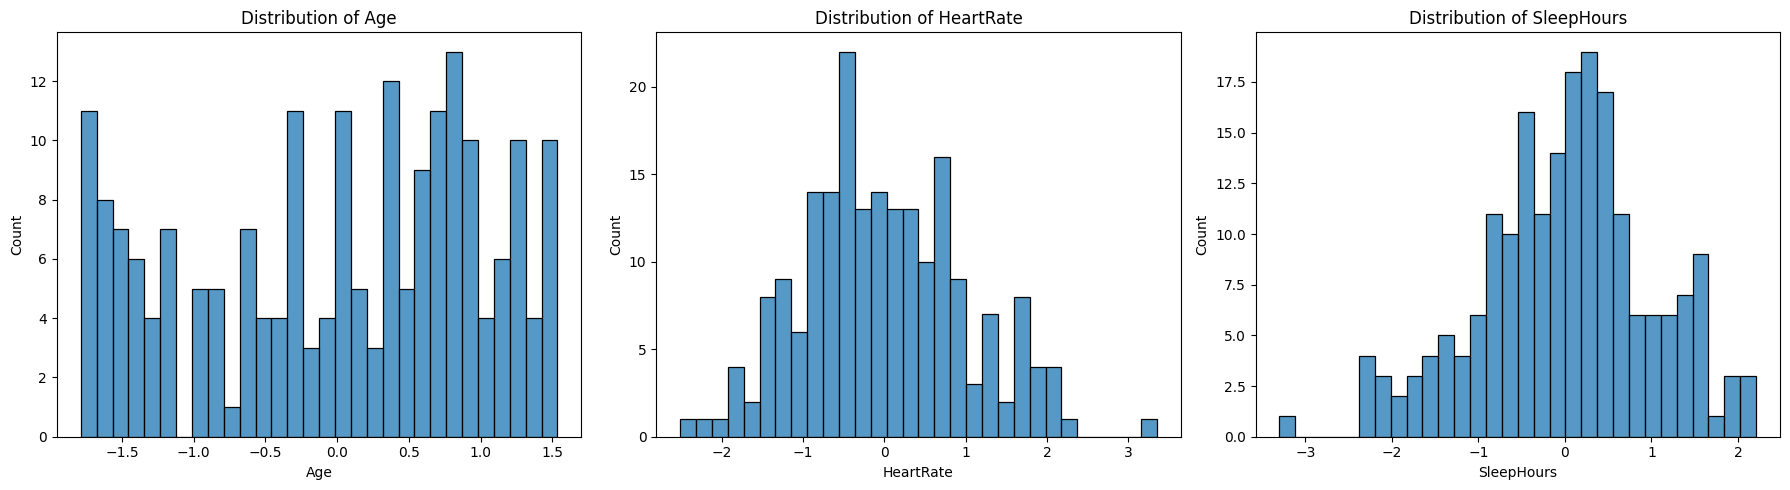

In [27]:
# Histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], bins=30, ax=axes[0])
axes[0].set_title('Distribution of Age')
sns.histplot(df['HeartRate'], bins=30, ax=axes[1])
axes[1].set_title('Distribution of HeartRate')
sns.histplot(df['SleepHours'], bins=30, ax=axes[2])
axes[2].set_title('Distribution of SleepHours')
plt.tight_layout()
plt.show()

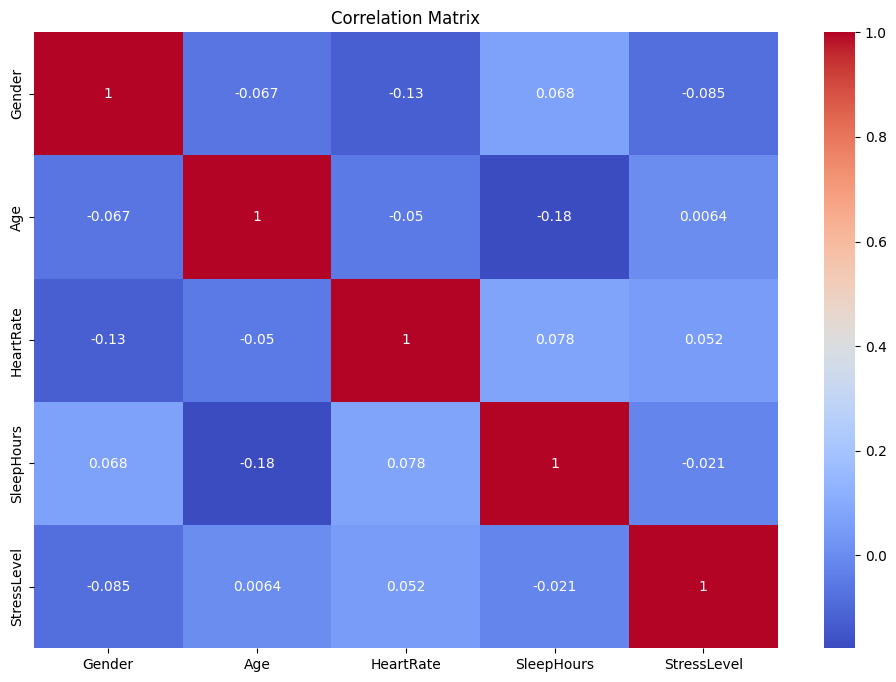

In [28]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_val)
log_reg_report = classification_report(y_val, y_pred_log_reg)
print("Logistic Regression Report:\n", log_reg_report)

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.45      0.36      0.40        14
           1       0.09      0.12      0.11         8
           2       0.00      0.00      0.00         8

    accuracy                           0.20        30
   macro avg       0.18      0.16      0.17        30
weighted avg       0.24      0.20      0.21        30



In [30]:
# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_val)
rf_report = classification_report(y_val, y_pred_rf)
print("Random Forest Report:\n", rf_report)

Random Forest Report:
               precision    recall  f1-score   support

           0       0.50      0.36      0.42        14
           1       0.31      0.50      0.38         8
           2       0.43      0.38      0.40         8

    accuracy                           0.40        30
   macro avg       0.41      0.41      0.40        30
weighted avg       0.43      0.40      0.40        30



In [31]:
# Support Vector Machine (SVM)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_val)
svm_report = classification_report(y_val, y_pred_svm)
print("SVM Report:\n", svm_report)

SVM Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52        14
           1       0.18      0.25      0.21         8
           2       0.00      0.00      0.00         8

    accuracy                           0.30        30
   macro avg       0.24      0.25      0.24        30
weighted avg       0.30      0.30      0.30        30



In [32]:
# Evaluation on Test Set with Best Model (Random Forest)
y_pred_test_rf = best_rf.predict(X_test)
test_rf_report = classification_report(y_test, y_pred_test_rf)
print("Test Set Evaluation with Random Forest Report:\n", test_rf_report)

Test Set Evaluation with Random Forest Report:
               precision    recall  f1-score   support

           0       0.40      0.44      0.42         9
           1       0.56      0.45      0.50        11
           2       0.18      0.20      0.19        10

    accuracy                           0.37        30
   macro avg       0.38      0.37      0.37        30
weighted avg       0.38      0.37      0.37        30



In [ ]:
#we have seen the accuracy is very let's try some optimization methods-


In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Analyze class distribution
class_distribution = df['StressLevel'].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 StressLevel
0    76
1    64
2    60
Name: count, dtype: int64


In [34]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [35]:
# Random Forest
grid_search_rf_balanced = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf_balanced.fit(X_res, y_res)
best_rf_balanced = grid_search_rf_balanced.best_estimator_
y_pred_rf_balanced = best_rf_balanced.predict(X_val)
rf_balanced_report = classification_report(y_val, y_pred_rf_balanced)
rf_balanced_accuracy = accuracy_score(y_val, y_pred_rf_balanced)
print("Random Forest Report (Balanced):\n", rf_balanced_report)
print("Random Forest Accuracy (Balanced):", rf_balanced_accuracy)

Random Forest Report (Balanced):
               precision    recall  f1-score   support

           0       0.56      0.36      0.43        14
           1       0.38      0.38      0.38         8
           2       0.46      0.75      0.57         8

    accuracy                           0.47        30
   macro avg       0.46      0.49      0.46        30
weighted avg       0.48      0.47      0.46        30

Random Forest Accuracy (Balanced): 0.4666666666666667


In [36]:
# Support Vector Machine (SVM)
grid_search_svm_balanced = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm_balanced.fit(X_res, y_res)
best_svm_balanced = grid_search_svm_balanced.best_estimator_
y_pred_svm_balanced = best_svm_balanced.predict(X_val)
svm_balanced_report = classification_report(y_val, y_pred_svm_balanced)
svm_balanced_accuracy = accuracy_score(y_val, y_pred_svm_balanced)
print("SVM Report (Balanced):\n", svm_balanced_report)
print("SVM Accuracy (Balanced):", svm_balanced_accuracy)

SVM Report (Balanced):
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        14
           1       0.42      0.62      0.50         8
           2       0.83      0.62      0.71         8

    accuracy                           0.57        30
   macro avg       0.61      0.58      0.58        30
weighted avg       0.61      0.57      0.58        30

SVM Accuracy (Balanced): 0.5666666666666667


In [ ]:
#here we can see the somehow we increasae the  accuracy using svm
# now we can use this model for the pediction